# Week 5 - Lab: Data Structures
## Examples

In [2]:
import csv
import matplotlib.pyplot as plt

We can use the CSV module to read data from CSV files. The following method reads from a file and splits the data into a column names list and a values list.

In [22]:
with open('medals_table.csv') as file:
    # Convert iterable to list
    medals = list(csv.DictReader(file))

This CSV file contains the medals table for the 2024 Paris Olympics

In [23]:
medals[:3]

[{'medal_type': 'Gold Medal',
  'medal_code': '1',
  'medal_date': '2024-07-27',
  'name': 'Remco EVENEPOEL',
  'country_code': 'BEL',
  'gender': 'M',
  'discipline': 'Cycling Road',
  'event': "Men's Individual Time Trial",
  'event_type': 'ATH'},
 {'medal_type': 'Silver Medal',
  'medal_code': '2',
  'medal_date': '2024-07-27',
  'name': 'Filippo GANNA',
  'country_code': 'ITA',
  'gender': 'M',
  'discipline': 'Cycling Road',
  'event': "Men's Individual Time Trial",
  'event_type': 'ATH'},
 {'medal_type': 'Bronze Medal',
  'medal_code': '3',
  'medal_date': '2024-07-27',
  'name': 'Wout van AERT',
  'country_code': 'BEL',
  'gender': 'M',
  'discipline': 'Cycling Road',
  'event': "Men's Individual Time Trial",
  'event_type': 'ATH'}]

We can use a dictionary to perform grouping operations on data. One common operation is to group together values by counting data in a certain category.

In the following example we are going to use the data from the CSV to count the number of medals by country.

In [24]:
country_medals = {}

# Loop through rows of CSV
for medal in medals:
    # Extract country code
    country = medal["country_code"]

    country_medals[country] = country_medals.get(country, 0) + 1

We can also use an `if` statement to do the same thing:

In [28]:
country_medals = {}

# Loop through rows of CSV
for medal in medals:
    # Extract country code
    country = medal["country_code"]
    
    # Create a blank entry in dict if the country code does not exist
    if country not in country_medals:
        country_medals[country] = 0
        
    # Increment value by one
    country_medals[country] += 1

To sort the dictionary, one approach would be to turn it into a key/value tuple using the `items()` method and then using the `sorted()` function to sort the list.

The `.items()` method converts a dictionary into a list of tuples containing key, value pairs.

In [29]:
country_medals.items()

dict_items([('BEL', 7), ('ITA', 35), ('AUS', 48), ('GBR', 56), ('USA', 111), ('CHN', 83), ('KOR', 28), ('TUN', 3), ('HKG', 4), ('FRA', 56), ('HUN', 15), ('KAZ', 7), ('JPN', 37), ('ESP', 15), ('MGL', 1), ('SWE', 10), ('FIJ', 1), ('RSA', 5), ('GER', 28), ('CAN', 24), ('MEX', 5), ('POL', 7), ('EGY', 1), ('BRA', 18), ('MDA', 4), ('UZB', 8), ('KOS', 2), ('IND', 6), ('TUR', 6), ('SVK', 1), ('UKR', 11), ('AZE', 5), ('CRO', 6), ('SUI', 8), ('ROU', 8), ('IRL', 7), ('GEO', 4), ('TJK', 3), ('SLO', 2), ('NZL', 15), ('SRB', 3), ('GUA', 2), ('PRK', 6), ('ARG', 3), ('GRE', 8), ('AUT', 4), ('NED', 29), ('ECU', 4), ('ISR', 6), ('POR', 3), ('UGA', 2), ('ETH', 2), ('CZE', 3), ('AIN', 4), ('PHI', 4), ('NOR', 3), ('GRN', 2), ('JAM', 6), ('LCA', 2), ('DMA', 1), ('TPE', 6), ('DEN', 5), ('LTU', 4), ('ARM', 3), ('ALG', 2), ('MAS', 2), ('DOM', 3), ('CPV', 1), ('CUB', 6), ('CHI', 2), ('COL', 3), ('KEN', 6), ('THA', 6), ('BRN', 2), ('IRI', 8), ('KGZ', 4), ('MAR', 2), ('ZAM', 1), ('CYP', 1), ('PER', 1), ('BOT', 1)

In [40]:
# Convert dictionary to tuple and sort using element one (the count calculated earlier)
sorted_medals = sorted(country_medals.items(), key=lambda m: m[1], reverse=True)
sorted_medals[:10]

[('USA', 111),
 ('CHN', 83),
 ('GBR', 56),
 ('FRA', 56),
 ('AUS', 48),
 ('JPN', 37),
 ('ITA', 35),
 ('NED', 29),
 ('KOR', 28),
 ('GER', 28)]

### Visualise
We can visualise this the data inside `sorted_medals` with a bar chart, however, it is currently a list containing tuples for each country. We need to seperate this into two lists, one with the countries, and another with the medal count.

One approach would be to use a `for` loop:

In [49]:
# Create two lists to hold our values
top_10_countries = []
top_10_medals = []

for country in sorted_medals[:10]:
    top_10_countries.append(country[0])
    top_10_medals.append(country[1])

print(top_10_countries, top_10_medals)

['USA', 'CHN', 'GBR', 'FRA', 'AUS', 'JPN', 'ITA', 'NED', 'KOR', 'GER'] [111, 83, 56, 56, 48, 37, 35, 29, 28, 28]


We can also do the same thing with the [zip](https://docs.python.org/3/library/functions.html#zip) function when it is used with an [unpacking operator](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) `*` which tells Python to take apart (or unpack) the tuple `('USA', 111)` into two seperate values.

In [59]:
list(zip(*sorted_medals[:10]))

[('USA', 'CHN', 'GBR', 'FRA', 'AUS', 'JPN', 'ITA', 'NED', 'KOR', 'GER'),
 (111, 83, 56, 56, 48, 37, 35, 29, 28, 28)]

We can then destructure the seperated tuples into two as follows:

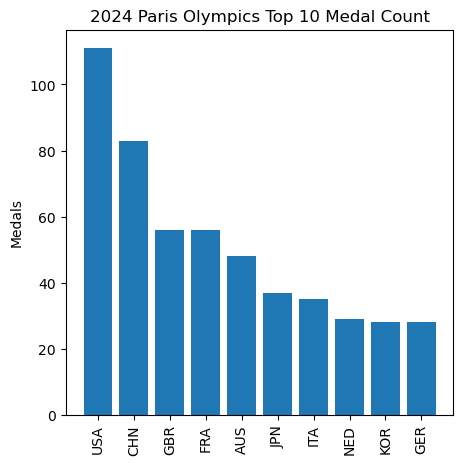

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))

# Destructure the country names and medals list into two lists
top_10_countries, top_10_medals = zip(*sorted_medals[:10])

# Plot bar chart and rotate x labels
ax.bar(top_10_countries, top_10_medals)
plt.xticks(rotation=90)

ax.set_title('2024 Paris Olympics Top 10 Medal Count')
ax.set_ylabel('Medals')

plt.show()

## Activity 1
Use the approach from above to recreate the top ten medals count per `discipline`.

In [60]:
# Write your code here

## Activity 2
We can use a histogram plot to understand the distribution of medals per country. Histograms show the frequency of each value, allowing you to understand patterns such as skewness, outliers and clustering.

Create a histogram of the medal count, what does it show us?

In [2]:
# Write your code here

## Activity 3
What were the unique `discipline` values in the dataset?

Hint: A set gives us unique values

In [3]:
# Write your code here

##  Grouping and Plotting
We can use the code below to create a line chart that shows how many medals were achieved on each `medal_date`.

In [12]:
dates = {}

for row in rows:
    date = row['medal_date'] # Current date in iteration
    medals = dates.get(date, 0) # Get current date value from date dict
    dates[date] = medals + 1 # Increment and replace

dates

{'2024-07-27': 41,
 '2024-07-28': 41,
 '2024-07-29': 59,
 '2024-07-30': 35,
 '2024-07-31': 56,
 '2024-08-01': 50,
 '2024-08-02': 72,
 '2024-08-03': 90,
 '2024-08-04': 70,
 '2024-08-05': 60,
 '2024-08-06': 47,
 '2024-08-07': 70,
 '2024-08-08': 86,
 '2024-08-09': 102}

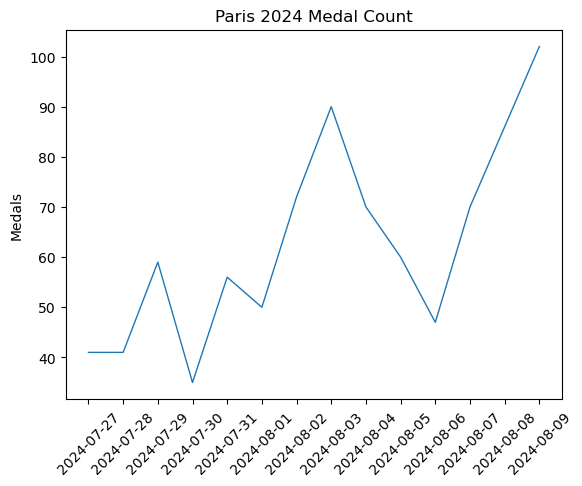

In [49]:
fig, ax = plt.subplots()

date, medals = zip(*dates.items())

ax.plot(date, medals, lw=1)
ax.set_title('Paris 2024 Medal Count')
ax.set_ylabel('Medals')

plt.xticks(rotation=45)
plt.show()

## Activity 5
Use the code above to write a function called `medal_dates()` that accepts a `country_code` and returns a dictionary containing dates and the numbers of medals earned.

### Example Output
```python
medal_dates('GBR')
```
```
{'2024-07-27': 2,
 '2024-07-28': 2,
 '2024-07-29': 6,
 '2024-07-30': 2,
 '2024-07-31': 5,
 '2024-08-01': 3,
 '2024-08-02': 7,
 '2024-08-03': 6,
 '2024-08-04': 4,
 '2024-08-05': 5,
 '2024-08-06': 4,
 '2024-08-07': 3,
 '2024-08-08': 2,
 '2024-08-09': 5}
```

In [93]:
# Write your code here

In [94]:
medal_dates('GBR')

{'2024-07-27': 2,
 '2024-07-28': 2,
 '2024-07-29': 6,
 '2024-07-30': 2,
 '2024-07-31': 5,
 '2024-08-01': 3,
 '2024-08-02': 7,
 '2024-08-03': 6,
 '2024-08-04': 4,
 '2024-08-05': 5,
 '2024-08-06': 4,
 '2024-08-07': 3,
 '2024-08-08': 2,
 '2024-08-09': 5}

## Activity 6
The top five countries to earn medals were the following, which we have extracted the country codes into the tuple `top_5_countries`.

Generate a line chart to show the numbers of medals earned by each country using the `medal_dates()` function you implemented in the previous activity.

Hint: you can call `ax.plot()` inside a for loop to create multiple line charts on the same axis.

In [95]:
top_5_countries, top_5_medals = zip(*sorted_medals[:5])
top_5_countries

('USA', 'CHN', 'GBR', 'FRA', 'AUS')

In [4]:
# Write your code here

## Activity 7
Find the top ten athletes who won the most medals, use the `name` key to find athletes.

In [5]:
# Write your code here

## Activity 8
You will have noticed after completing the previous activity that it includes names which specify a category rather than an individual.

Look up all the awards given to a particular country name in the `name` key to find out why this may be the case.

In [6]:
# Write your code here

## Activity 9
Completing the previous activity may have led you to the `event_type` key, find all the unique values for the key in the dataset and check if it matches the [Olympic event type](https://odf.olympictech.org/2024-Paris/codes/HTML/pg_cc/EventUnitType.htm) definitions.

In [7]:
# Write your code here

## Activity 10
Rewrite your answer from activity six to count only `event_type` that are `ATH` and counting only the `medal_type` when it is a `Gold Medal`. Sort your answer by medal count.

In [8]:
# Write your code here